# Homework 2  | Correlation, Casuation, & Regression
### Assigned Tuesday, 6 Mar 2018  /  Due Tuesday, Mar 13 2018

#### Goal:
We're going to spend some time thinking through claims of causation and correlation. We already saw in our Freedman and Desrosieres readings, and in our discussion of lab 6 ("Yuletide"), that Yule's 1899 "An Investigation into the Causes of changes in Pauperism[...]" argued that pauperism was *caused* by giving monetary aid to the poor (i.e., 'out-relief'). Earlier, in 1897, Yule had suggesting linear regression using the method of least squares (i.e., generating a line formed by minimizing the square of the redsiduals) and to use multiple variable regressions (Desrosieres 134). You're going to get more familar with some of the statistical techniques that Yule and others were using, reflect upon the assumptions of these tools, and, as always, reflect upon the provenance of the data we're using.  

## Homework Problems 
#### This assignment is to be done on your own. Provide your code to justify your answer to each question.  Be sure to rename this homework so that it includes your name. 

#### question 1) 
We're going to use the data that we used for lab 6 - Yuletide. One line of code has been provided. Download this data and use head command to re-familarize yourself with the data. Then use describe to get a sense of how the data is distributed. (Note that "MRI_count" here is a measure of brain size. Also recall the long history of using brain size to argue for different racial differences in intelligence, as discussed by Gould's *The Mismeasure of Man* and others.) [2 points] 

Ten points of EXTRA CREDIT if you can track down some useful (i.e., citable) information about where this data set came from, where it was used, or how it was produced.   

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('http://www.scipy-lectures.org/_downloads/brain_size.csv', sep=';', na_values=".")

In [4]:
data.head()

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545


In [5]:
data.describe()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
count,40.000000,40.000000,40.000000,40.00000,38.000000,39.000000,4.000000e+01
mean,20.500000,113.450000,112.350000,111.02500,151.052632,68.525641,9.087550e+05
std,11.690452,24.082071,23.616107,22.47105,23.478509,3.994649,7.228205e+04
min,1.000000,77.000000,71.000000,72.00000,106.000000,62.000000,7.906190e+05
25%,10.750000,89.750000,90.000000,88.25000,135.250000,66.000000,8.559185e+05
50%,20.500000,116.500000,113.000000,115.00000,146.500000,68.000000,9.053990e+05
75%,30.250000,135.500000,129.750000,128.00000,172.000000,70.500000,9.500780e+05
max,40.000000,144.000000,150.000000,150.00000,192.000000,77.000000,1.079549e+06


In [6]:
# NOTE THAT ROWS 1 AND 20 CONTAIN NANs
data

,Unnamed: 0,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
0,1,Female,133,132,124,118.0,64.5,816932
1,2,Male,140,150,124,NaN,72.5,1001121
2,3,Male,139,123,150,143.0,73.3,1038437
3,4,Male,133,129,128,172.0,68.8,965353
4,5,Female,137,132,134,147.0,65.0,951545
5,6,Female,99,90,110,146.0,69.0,928799
6,7,Female,138,136,131,138.0,64.5,991305
7,8,Female,92,90,98,175.0,66.0,854258
8,9,Male,89,93,84,134.0,66.3,904858
9,10,Male,133,114,147,172.0,68.8,955466


#### Since we can't calculate certain statistics with missing data, let's also create a data set in which we remove the NANs.  

In [7]:
data_NoNANs = data.dropna()

In addition to the usual libraries, you'll also need the stats library for this homework. Let's just add it now. 

In [8]:
import scipy.stats as st

#### Extra Credit
1. The original paper for the data set: Willerman, L., Schultz, R., Rutledge, J. N., and Bigler, E. (1991),
"In Vivo Brain Size and Intelligence," _Intelligence_ 15, 223-228. 
2. Regarding the data set construction:
> "Willerman et al. (1991) conducted their study at a large southwestern university. They selected a sample of 40 right-handed Anglo introductory psychology students who had indicated no history of alcoholism, unconsciousness, brain damage, epilepsy, or heart disease. These subjects were drawn from a larger pool of introductory psychology students with total Scholastic Aptitude Test Scores higher than 1350 or lower than 940 who had agreed to satisfy a course requirement by allowing the administration of four subtests (Vocabulary, Similarities, Block Design, and Picture Completion) of the Wechsler (1981) Adult Intelligence Scale-Revised. With prior approval of the University's research review board, students selected for MRI were required to obtain prorated full-scale IQs of greater than 130 or less than 103, and were equally divided by sex and IQ classification. 
The MRI Scans were performed at the same facility for all 40 subjects. The scans consisted of 18 horizontal MR images. The computer counted all pixels with non-zero gray scale in each of the 18 images and the total count served as an index for brain size." 
> quoted from  https://www3.nd.edu/~busiforc/handouts/Data%20and%20Stories/correlation/Brain%20Size/brainsize.html


#### question 2) 

What is the Pearson correlation coefficient $r$ and what does it tell you about correlation? Explain the possible values for $r$ and what that tells you about correlation. Now compute r for FSIQ vs VIQ, Weight vs Height, and MRI_count vs PIQ using `st.pearsonr` (see lab 6). Explain the correlation between these three pairs of variables using $r$. [10 points, 100 words max]  

EXTRA CREDIT: Above I've asked you to provide a mathematical interpretation of $r$, but (as I hope is very clear from our class discussions and from the readings) the very decision to correlate intelligence to brain size is deeply problematic. Why? If $r$ suggests there is a correlation between two things we already understand to be uncorrelated, where did we go wrong? [5 extra credit points, 50 words max]    
 

#### Q2 ANSWER
Pearson correlation coefficient r measures the linear relationship between two datasets, and assumes that both datasets are gaussian-distributed. Has range from +1 to -1, where +1 is a correlated one-to-one relationship, 0 is uncorrelated, and -1 is an anticorrelated one-to-one relationship (i.e., x increases as y decreases). The pearsonr function returns both r and its corresponding p-value.

##### ASIDE on calculating linear regression:
The slope of your regression line, b, is 
$b = r (\sigma_y / \sigma_x)$, where $\sigma_y$ and $\sigma_x$ are the respective standard deviations of y and x. 

In [9]:
# r for original data
r_FSIQvsVIQ = st.pearsonr(data.FSIQ,data.VIQ)
r_WeightvsHeight = st.pearsonr(data.Weight,data.Height)
r_MRIvsPIQ = st.pearsonr(data.MRI_Count,data.PIQ)

# r with NANs removed
r_FSIQvsVIQ_noNANs = st.pearsonr(data_NoNANs.FSIQ,data_NoNANs.VIQ)
r_WeightvsHeight_noNANs = st.pearsonr(data_NoNANs.Weight,data_NoNANs.Height)
r_MRIvsPIQ_noNANs = st.pearsonr(data_NoNANs.MRI_Count,data_NoNANs.PIQ)

print("WITH MISSING VALUES:")
print("r for FSIQ vs VIQ: " + str(r_FSIQvsVIQ))
print("r for Weight vs Height: " + str(r_WeightvsHeight))
print("r for MRI vs PIQ: " + str(r_MRIvsPIQ))
print("")
print("WITH NANs REMOVED:")
print("r for FSIQ vs VIQ: " + str(r_FSIQvsVIQ_noNANs))
print("r for Weight vs Height: " + str(r_WeightvsHeight_noNANs))
print("r for MRI vs PIQ: " + str(r_MRIvsPIQ_noNANs))


WITH MISSING VALUES:
r for FSIQ vs VIQ: (0.9466387777452883, 2.7891295872460784e-20)
r for Weight vs Height: (nan, 1.0)
r for MRI vs PIQ: (0.3868173150245029, 0.013674636036073246)

WITH NANs REMOVED:
r for FSIQ vs VIQ: (0.9451142929017027, 4.520765026525871e-19)
r for Weight vs Height: (0.699614004238759, 1.0214620551543478e-06)
r for MRI vs PIQ: (0.37778161934670607, 0.019366055094400248)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa693159ba8>,
      dtype=object)

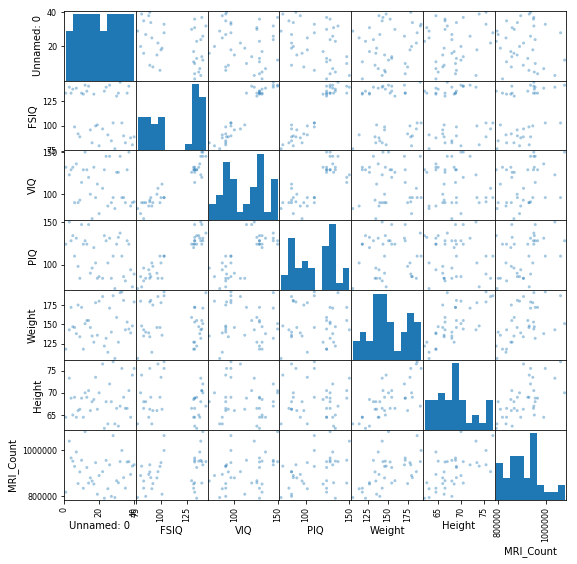

In [10]:
# Q2 Extra Credit
from pandas.plotting import scatter_matrix
%matplotlib inline
scatter_matrix(data_NoNANs, alpha = .4, figsize=(9,9))

#### Note the historgrams for the various IQ measures are all roughly bimodal. These distributions are not normal distributions, but pearsonr assumes they are.   

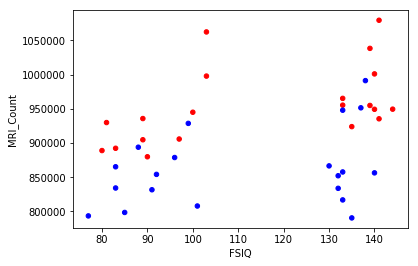

In [17]:
# To make the point more strongly, let's compare MRI vs FSIQ
# while keeping track of gender of our data set

from pandas.tools.plotting import scatter_matrix
colors= {'Female': 'blue', 'Male': 'red'} #reversed the standard colors associated with the genders
data.plot.scatter('FSIQ', 'MRI_Count',c=data['Gender'].apply(lambda x: colors[x]))

#### Wow. These are important biases in our data set.   We would do well to not use this data set to make any claims...

#### question 3) 

Explain the possible values for $R^2$, and what that tells you about correlation. Compute the $R^2$ value for FSIQ vs VIQ, Weight vs Height, and MRI_count vs PIQ. (See "lab 5 - Yuletide" for how to compute $R^2$). Is just using $R^2$ sufficient to determine correlation? Explain. [10 points, 100 words max]. 

#### Q3 Answer
R-squared (aka "the coefficient of determination" or "coefficient of multiple determination" for mulitple regressions) is a measure of how closely your data fits your regression line. To wit: 

$R^2$ = linear regression model variation / total variation

where R-squared ranges from 0% to 100%. It can be used as a quick measure to evaluate the goodness-of-fit of your regression, BUT WILL NOT TELL YOU ABOUT ANY SYSTEMATIC BIAS OF YOUR REGRESSION LINE. (You should always check your residual plots when using R-squared.)  


R-squared can be strongly influenced by a few outlier data points. Also, data might not have a linear relationship but you may still get a high $R^2$ value. <b>Always plot and examine the residuals when using $R^2$.<b> 



#### THERE ARE AT LEAST TWO WAYS WE CAN CALCULATE R-SQUARED.
We can either 
1. use sklearn to perform the regression for each case and then use use the linear regression model "score" to get $R^2$; or
2. just square the values we got for question 2 above. 

I'll do an example of both ways for FSIQ vs VIQ, but then use the second way for everything as it's much easier.


In [11]:
# R-squared for FSIQ vs VIQ, using sklearn and dataset with NANs removed
from sklearn.linear_model import LinearRegression
model = LinearRegression()
X = (data_NoNANs.FSIQ).values.reshape(-1,1)
y=data_NoNANs.VIQ
model.fit(X,y)
print("R-squared for FSIQ v VIQ, using sklearn: " + str(model.score(X,y)))

# R-squared for FSIQ vs VIQ, using r from question 2
print("R-squared for FSIQ vs VIQ, using r from Q2: " + str(r_FSIQvsVIQ_noNANs[0]*r_FSIQvsVIQ_noNANs[0]))

R-squared for FSIQ v VIQ, using sklearn: 0.8932410266470852
R-squared for FSIQ vs VIQ, using r from Q2: 0.8932410266470855


In [12]:
# For the remaining R-squared values, I use r from Q2

print("WITH MISSING VALUES:")
print("R-squared for FSIQ vs VIQ: " + str(r_FSIQvsVIQ[0]*r_FSIQvsVIQ[0]))
print("R-squared for Weight vs Height: " + str(r_WeightvsHeight[0]*r_WeightvsHeight[0]))
print("R-squared for MRI vs PIQ: " + str(r_MRIvsPIQ[0]*r_MRIvsPIQ[0]))
print("")
print("WITH NANs REMOVED:")
print("R-squared for FSIQ vs VIQ: " + str(r_FSIQvsVIQ_noNANs[0]*r_FSIQvsVIQ_noNANs[0]))
print("R-squared for Weight vs Height: " + str(r_WeightvsHeight_noNANs[0]*r_WeightvsHeight_noNANs[0]))
print("R-squared for MRI vs PIQ: " + str(r_MRIvsPIQ_noNANs[0]*r_MRIvsPIQ_noNANs[0]))

WITH MISSING VALUES:
R-squared for FSIQ vs VIQ: 0.8961249755310933
R-squared for Weight vs Height: nan
R-squared for MRI vs PIQ: 0.1496276352027655

WITH NANs REMOVED:
R-squared for FSIQ vs VIQ: 0.8932410266470855
R-squared for Weight vs Height: 0.48945975492699023
R-squared for MRI vs PIQ: 0.14271895191621953


#### question 4) 
Perform two different linear regressions using the scikit-learn library (as demonstrated in "Lab 5 - Yuletide"), in which each regression compares two variables from the data above. How strong is the correlation for the two pairs of variables you regressed upon? [10 points] 

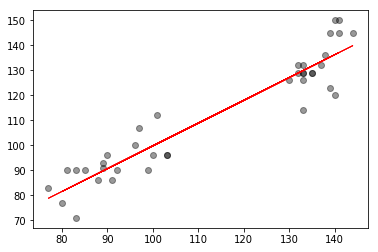

...which, as we have already seen, has an R-squared score of 0.8932410266470852, but note the gap in the data! That should make you suspicious of the result!


In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# As we did in question 3 for FSIQ vs VIQ...

model = LinearRegression()
X = (data_NoNANs.FSIQ).values.reshape(-1,1)
y=data_NoNANs.VIQ
model.fit(X,y)
plt.scatter(X, y,  color='black', alpha = .4)
plt.plot(X, model.predict(X), color='red', linewidth=1)
plt.show()
print("...which, as we have already seen, has an R-squared score of " \
      + str(model.score(X,y)) + ", but note the gap in the data! That"
      + " should make you suspicious of the result!")


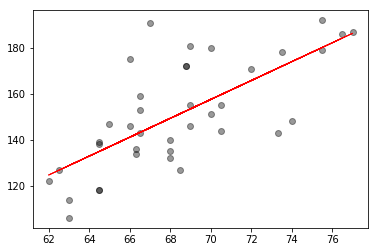

...which has an R-squared score of 0.48945975492699


In [14]:
model = LinearRegression()
X = (data_NoNANs.Height).values.reshape(-1,1)
y=data_NoNANs.Weight
model.fit(X,y)
plt.scatter(X, y,  color='black', alpha = .4)
plt.plot(X, model.predict(X), color='red', linewidth=1)
plt.show()
print("...which has an R-squared score of " + str(model.score(X,y)))

#### question 5)

Consider your answer in question 4: What assumptions do we have to make if we wish to argue that the linear regression you performed demonstrates a causal relationship? (Hint: Recall Yule's argument about this that we saw in lab 5.) Are these assumptions valid for the data you used in problem 4? Explain. [10 points, 100 words max]     

#### Q5 Answer
For our regressions to indicate causality, we need to assume that our variable y fully explains the observations of X. However, it's certaintly the case that other variables also influence y, and any causal claims effectively need to take into account all the causal variables involved (i.e., we need to be sure there are no "confounding variables"). Determining what all the causal variables are is a very difficult question to answer for most interesting questions! (Recall 
Yule!) 

Related to this, we need to be sure that our y does not have a causal influence on X.  

We also need to beware of statistical bias we might introduce by our selection and/or construction of data: we need to randomly draw from a "representative" sample population if we wish to make a causal claim for that population, but (from our answer to question 1 extra credit) we know we specifically didn't do that. 

Finally, if we're going to make causal claims, we also need to have some kind of control or clearly defined null hypothesis. 

#### question 6)
Generally, what is the purpose of performing a t-test? What's the difference between st.ttest_1samp() and st.ttest_ind(). Use the ? to get documents. [10 points, 100 words max]

#### Q6 answer

Student's t distribution is actually a family of distributions, which converges to a gaussian distribution as the number of samples $n \rightarrow \infty$. What we actually want is to determine the gaussian-distributed population but in practice we don't know what that is because all we have is a sample drawn from that distribution. This sample will give us a t distribution. The t distribution can be used to test a hypothesis that a sample comes from a gaussian-distributed population. What are the assumptions? 
1. One or both samples come from normally-distributed populations
2. The variance is the same for both populations
As already noted, the t distribution for a sample changes with sample size (i.e., the number of data points).

For a 1-sample t-test, you are trying to decide if your sample came from a population with a particular mean. For this test, you specify the mean as the null hypothesis. Using the resultant p-value and a chosen threshold value (e.g., 1%, 5%, etc.) we can reject the null hypothesis.    

For an independent t-test, you're trying to decide how likely the two samples you have come from a population with the same mean (and assumes that the variances of these populations are equal). (ASIDE: if you don't want to assume equal population variances, you want a Welch's t-test which you can with this function by setting equal_var = False.) Your null hypothesis is that both populations have equal averages. Using the resultant p-value and a chosen threshold value can allow use to reject the null hypothesis.      

(There's also a paired-sample t-test where you compare the same group at two different times, but we won't worry about that here.)

#### question 7) 
What does <code>st.ttest_1samp(data['VIQ'], 100)</code> do and how should it be interpreted? What would Fisher say about this? Likewise, what question does  <code>st.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)</code> ask and how should the result be interpreted? [10 points, 100 words max]

In [15]:
# Q7 Answer

# IQ values are *defined* to have a mean of 100, so we would hope 
# that this test would find the null hypothesis to be true.
st.ttest_1samp(data['VIQ'], 100)



Ttest_1sampResult(statistic=3.3074146385401786, pvalue=0.002030117404781822)

Which gives 3.307 standard errors with a very low p-value = 0.2% < 5%. Accordingly, the t test suggests that we need to reject the null hypothesis that the VIQ data comes from a normal distribution with a mean = 100, with equal variance (assuming our rejection threshold is 5%).  

In [18]:
# Likewise...
st.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

Our t statistic is 1.784 standard errors with a p-value = 8% > 5%, which does not allow us to reject our null hypothesis that these two distributions come from the same normally-distributed population with the same mean. (By subtracting one data set from the other and setting the null hypothesis to 0, we are implicitly checking to see if these two data sets come from a population with the same mean.) 

#### question 8)
What are p-values and what is p-hacking? (See, for instance,  http://www.nature.com/news/scientific-method-statistical-errors-1.14700 ). What are type 1 and type 2 errors? What did Fisher, Neymann, and Egon Pearson think about p-values, type 1 and type 2 error? Who came up with what? [10 points, 200 words max]

Fisher intended p-values (as acquired in question 7 above) as a useful guide for further exploration. Fisher did not intend for p-values to be taken so seriously. Rivals to Fisher, Neyman and (Egon) Pearson presented in a 1933 paper a framework with type I error (i.e., false positives) and type II error (i.e., false negatives) and no p-values. Fisher himself rejected the very idea of type II error--Fisher's disagreement had to due with the role of counterfactuals. For Fisher one could never prove the null hypothesis, but only disprove it.  Oddly, both systems were combined, and a p-value < 5% was defined as "statistically significant". In fact, all this can do is summarize data given a null hypothesis--but to make statements about reality you need the probability that the null hypothesis was real to begin with. If the null hypothesis was very unlikely to begin with, there's a low chance that your low p-value score actually reflects a real result. P-hacking is when you purposely add or subtract variables (or data points or other data manipulations) to make your p-values more significant (i.e., less than 5% or 1%), leading to more false positives and placing far greater emphasis on very small observed effects. (To fight against p-hacking, some argue that one should always report sample size and confidence intervals.)   